In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')
sns.set_palette('dark')

In [2]:
df = pd.read_csv('/content/drive/MyDrive/datasets/netflix_titles.csv')

In [3]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [5]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [6]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [7]:
df['date_added'].fillna('September 20, 2019', inplace=True)
df.fillna('unknown', inplace=True)
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
def make_annotation(ax, df):
  for p in ax.patches:
    x = p.get_bbox().get_points()[:,0]
    y = p.get_bbox().get_points()[1,1]
    ax.annotate(f'{100*y/len(df):.1f}%', (x.mean(),y), ha='center', va='bottom')

In [10]:
df.drop('show_id', axis=1, inplace=True)
df.columns

Index(['type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [11]:
df['type'].nunique()

2

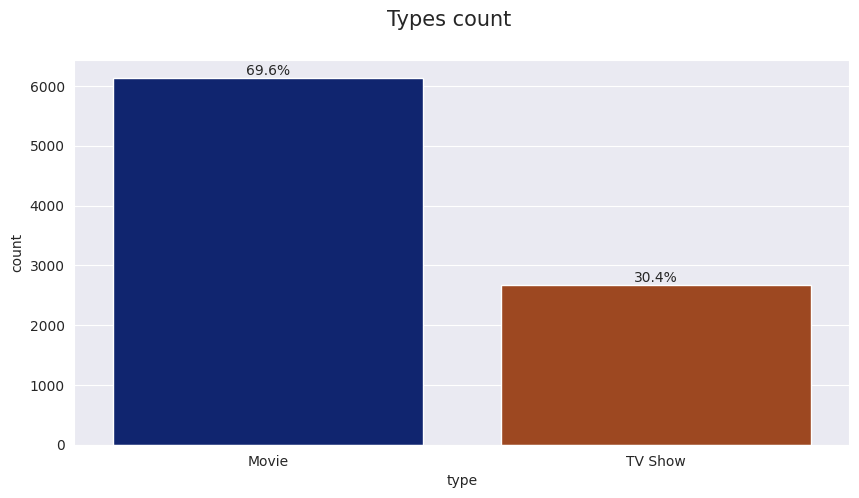

In [12]:
plt.figure(figsize=(10,5))
plt.suptitle('Types count', fontsize=15)

ax = sns.countplot(x='type', data=df)
make_annotation(ax, df)

In [13]:
df.groupby(['type', 'rating']).count()['title'].unstack().fillna(0)

rating,66 min,74 min,84 min,G,NC-17,NR,PG,PG-13,R,TV-14,TV-G,TV-MA,TV-PG,TV-Y,TV-Y7,TV-Y7-FV,UR,unknown
type,,,,,,,,,,,,,,,,,,
Movie,1.0,1.0,1.0,41.0,3.0,75.0,287.0,490.0,797.0,1427.0,126.0,2062.0,540.0,131.0,139.0,5.0,3.0,2.0
TV Show,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,2.0,733.0,94.0,1145.0,323.0,176.0,195.0,1.0,0.0,2.0


In [14]:
types = df.groupby(['type', 'release_year']).count()['title']
types

type     release_year
Movie    1942              2
         1943              3
         1944              3
         1945              3
         1946              1
                        ... 
TV Show  2017            265
         2018            380
         2019            397
         2020            436
         2021            315
Name: title, Length: 119, dtype: int64

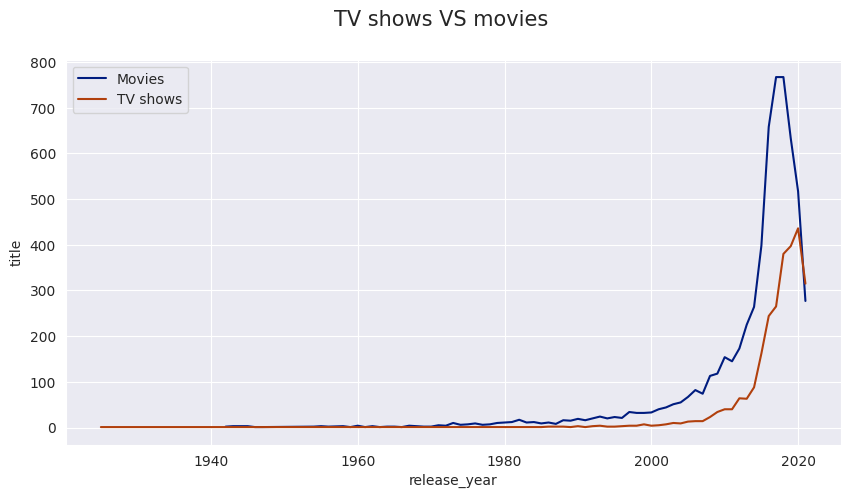

In [15]:
plt.figure(figsize=(10,5))
plt.suptitle('TV shows VS movies', fontsize=15)

ax1 = sns.lineplot(types.loc['Movie'], label='Movies')
ax2 = sns.lineplot(types.loc['TV Show'], label='TV shows')

plt.legend()

In [16]:
directors = df.groupby('director').count()['title'].sort_values(ascending=False)
directors[1:16]

director
Rajiv Chilaka             19
Raúl Campos, Jan Suter    18
Marcus Raboy              16
Suhas Kadav               16
Jay Karas                 14
Cathy Garcia-Molina       13
Martin Scorsese           12
Jay Chapman               12
Youssef Chahine           12
Steven Spielberg          11
Don Michael Paul          10
David Dhawan               9
Lance Bangs                8
Shannon Hartman            8
Johnnie To                 8
Name: title, dtype: int64

In [17]:
top_directors = pd.merge(directors[1:16], df[['director', 'country']], left_index=True, right_on='director').drop_duplicates()
top_directors.reset_index(inplace=True)

names = list(directors.index)
countries = {}
for name in names:
  countries[name] = tuple(set(top_directors[top_directors['director'] == name]['country']))

countries = pd.Series(countries)
countries.name = 'director'

top_directors = pd.merge(countries, top_directors[['title', 'director']], left_index=True, right_on='director')
top_directors.drop('director_y', axis=1, inplace=True)

top_directors.rename({'director': 'director', 'director_x': 'countries', 'title': 'title'}, axis=1, inplace=True)
top_directors.drop_duplicates(inplace=True)
top_directors.reset_index(inplace=True, drop=True)

In [18]:
def correction(t_row):
  row = ', '.join(map(str, t_row))
  row = row.replace('()', '')

  return row

In [19]:
top_directors['countries'] = top_directors['countries'].apply(correction)
top_directors

,director,countries,title
0,Rajiv Chilaka,"unknown, India",19
1,"Raúl Campos, Jan Suter","Mexico, Colombia, Chile, Argentina",18
2,Marcus Raboy,"unknown, United States",16
3,Suhas Kadav,"unknown, India",16
4,Jay Karas,United States,14
5,Cathy Garcia-Molina,Philippines,13
6,Martin Scorsese,"United States, United Kingdom, United States, ...",12
7,Jay Chapman,United States,12
8,Youssef Chahine,"France, Egypt, Egypt, Algeria, Egypt, France, ...",12
9,Steven Spielberg,"United States, United States, India, United St...",11


In [20]:
titles_type = pd.merge(top_directors['director'], df, on='director')
titles_type

,director,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description
0,Rajiv Chilaka,Movie,Chhota Bheem - Neeli Pahaadi,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",unknown,"July 22, 2021",2013,TV-Y7,64 min,Children & Family Movies,Things get spooky when Bheem and his buddies t...
1,Rajiv Chilaka,Movie,Chhota Bheem & Ganesh,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",unknown,"July 22, 2021",2009,TV-Y7,68 min,Children & Family Movies,Bheem and Lord Ganesha join forces to save Dho...
2,Rajiv Chilaka,Movie,Chhota Bheem & Krishna: Mayanagari,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",unknown,"July 22, 2021",2011,TV-Y7,67 min,Children & Family Movies,Young lord Krishna has fallen for demoness Maa...
3,Rajiv Chilaka,Movie,Chhota Bheem & Krishna: Pataliputra- City of t...,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",unknown,"July 22, 2021",2010,TV-Y7,66 min,Children & Family Movies,Krishna needs Bheem’s help: The ruined city of...
4,Rajiv Chilaka,Movie,Chhota Bheem And The Broken Amulet,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",India,"July 22, 2021",2013,TV-Y7,64 min,Children & Family Movies,When a stranger tries to steal an amulet from ...
...,...,...,...,...,...,...,...,...,...,...,...
181,Johnnie To,Movie,"Justice, My Foot!","Stephen Chow, Anita Mui, Carrie Ng, Wai Ai, Be...",Hong Kong,"August 31, 2018",1992,TV-14,95 min,"Action & Adventure, Comedies, International Mo...",Slick lawyer Sung fears he's been cursed with ...
182,Johnnie To,Movie,Lifeline,"Lau Ching Wan, Alex Fong, Carman Lee, Ruby Won...",Hong Kong,"August 16, 2018",1997,TV-14,104 min,"Action & Adventure, International Movies",Johnnie To's character-centered drama follows ...
183,Johnnie To,Movie,Loving You,"Lau Ching Wan, Carman Lee, Tsung-Hua To, Chung...",Hong Kong,"August 16, 2018",1995,TV-14,79 min,"Dramas, International Movies","Struggling in a loveless marriage, a hard-drin..."
184,Johnnie To,Movie,The Bare-Footed Kid,"Aaron Kwok, Lung Ti, Maggie Cheung, Chien-lien...",Hong Kong,"August 16, 2018",1993,TV-14,83 min,"Action & Adventure, International Movies","While working at a family friend's business, a..."


In [21]:
c = {}
for name in names[1:16]:
  c[name] = {
      'movies': titles_type[(titles_type['director'] == name) & (titles_type['type'] == 'Movie')].count()[0],
      'shows': titles_type[(titles_type['director'] == name) & (titles_type['type'] == 'TV Show')].count()[0]
  }

pd.DataFrame(c)

,Rajiv Chilaka,"Raúl Campos, Jan Suter",Marcus Raboy,Suhas Kadav,Jay Karas,Cathy Garcia-Molina,Martin Scorsese,Jay Chapman,Youssef Chahine,Steven Spielberg,Don Michael Paul,David Dhawan,Lance Bangs,Shannon Hartman,Johnnie To
movies,19,18,15,16,14,13,12,12,12,11,10,9,8,8,8
shows,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [22]:
from collections import Counter

s = (' '.join(map(str, list(df['cast'])))).split(', ')
actors = Counter(s)

sorted_actors = dict(sorted(actors.items(), key=lambda x: x[1], reverse=True))

actors = pd.Series(sorted_actors)
actors.name = 'titles'
actors[:15]

Anupam Kher         37
Rupa Bhimani        31
Takahiro Sakurai    29
Julie Tejwani       28
Om Puri             27
Paresh Rawal        25
Andrea Libman       24
Jigna Bhardwaj      23
Rajesh Kava         22
Vincent Tong        22
Yuki Kaji           22
Junichi Suwabe      20
Kareena Kapoor      20
Fred Tatasciore     19
Boman Irani         19
Name: titles, dtype: int64

In [23]:
pairs = []
for i in range(len(df)):
  dir = tuple(df['director'][i].split(', '))
  act = tuple(df['cast'][i].split(', '))

  if 'unknown' in dir or 'unknown' in act:
    continue

  for d in dir:
    for a in act:
      pairs.append((d, a))

da_rel = pairs
da_rel = Counter(da_rel)

sorted_da_rel = dict(sorted(da_rel.items(), key=lambda x: x[1], reverse=True))

da_rel = pd.Series(sorted_da_rel)
da_rel.name = 'relations'
da_rel[:30]

Rajiv Chilaka        Julie Tejwani         19
                     Rajesh Kava           19
                     Rupa Bhimani          18
                     Jigna Bhardwaj        18
                     Vatsal Dubey          16
                     Mousam                13
                     Swapnil               13
Suhas Kadav          Saurav Chakraborty     8
Toshiya Shinohara    Kappei Yamaguchi       7
                     Satsuki Yukino         7
                     Koji Tsujitani         7
                     Houko Kuwashima        7
                     Kumiko Watanabe        7
Yılmaz Erdoğan       Yılmaz Erdoğan         7
S.S. Rajamouli       Prabhas                7
                     Rana Daggubati         7
                     Anushka Shetty         7
                     Tamannaah Bhatia       7
                     Sathyaraj              7
                     Nassar                 7
                     Ramya Krishnan         7
David Dhawan         Anupam Kher  

<ipython-input-24-6a8eb885160b>:4: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  top_countries_prod = countries_prod[:10].append(other)


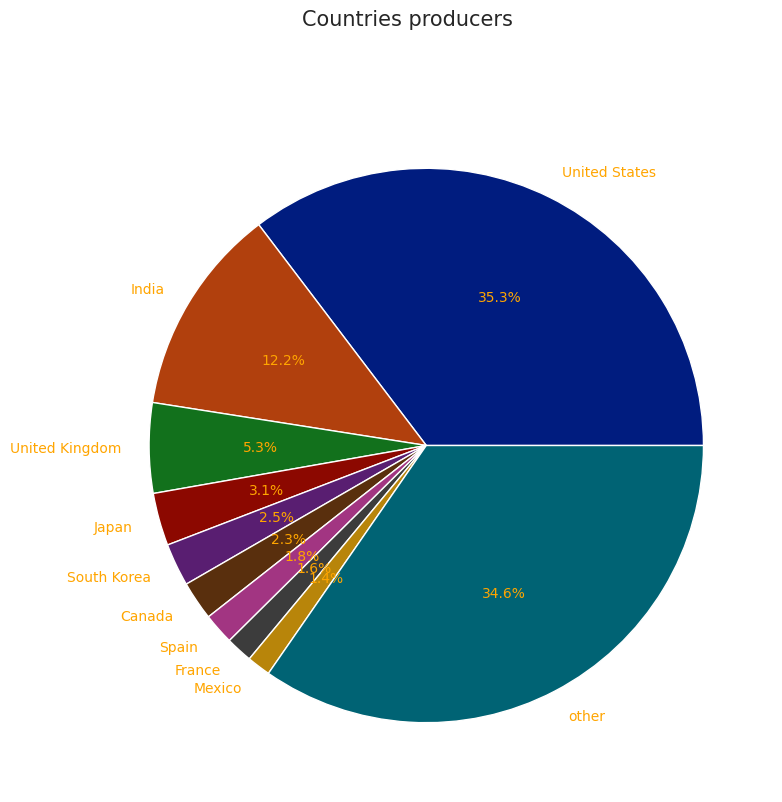

In [24]:
countries_prod = df.groupby('country').count()['title'].sort_values(ascending=False)
other = pd.Series(countries_prod.sum() - countries_prod[:10].sum(), ['other'])

top_countries_prod = countries_prod[:10].append(other)

del top_countries_prod['unknown']

plt.figure(figsize=(15,9))
plt.suptitle('Countries producers', fontsize=15)

ax = plt.pie(top_countries_prod, labels=top_countries_prod.index, autopct='%1.1f%%', textprops={'color': 'orange'})

In [25]:
df.dtypes

type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [26]:
df['date_added'] = pd.to_datetime(df['date_added'], yearfirst=True)
df['date_added'].dtype

dtype('<M8[ns]')

In [27]:
df['month'] = pd.DatetimeIndex(df['date_added']).month
df.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",9
1,TV Show,Blood & Water,unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",9
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",unknown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,9
3,TV Show,Jailbirds New Orleans,unknown,unknown,unknown,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",9
4,TV Show,Kota Factory,unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,9


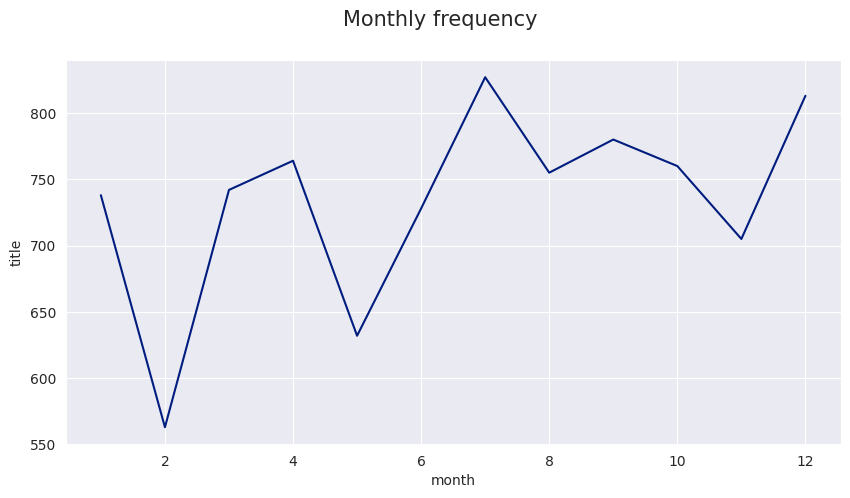

In [28]:
date = df.groupby('month').count()['title']

plt.figure(figsize=(10,5))
plt.suptitle('Monthly frequency', fontsize=15)

ax = sns.lineplot(date)

In [29]:
df.drop(['month'], axis=1, inplace=True)
df.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,TV Show,Blood & Water,unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",unknown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,TV Show,Jailbirds New Orleans,unknown,unknown,unknown,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,TV Show,Kota Factory,unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [30]:
def types(s):
  tps = []
  for i in range(len(s)):
    row = s[i]
    if row.find(','):
      row = row.split(', ')
    tps += row

  return tps

In [31]:
genres = types(df['listed_in'])
genres = Counter(genres)

sorted_genres = dict(sorted(genres.items(), key=lambda x: x[1], reverse=True))

genres = pd.Series(sorted_genres)
genres.name = 'genres'
genres

International Movies            2752
Dramas                          2427
Comedies                        1674
International TV Shows          1351
Documentaries                    869
Action & Adventure               859
TV Dramas                        763
Independent Movies               756
Children & Family Movies         641
Romantic Movies                  616
TV Comedies                      581
Thrillers                        577
Crime TV Shows                   470
Kids' TV                         451
Docuseries                       395
Music & Musicals                 375
Romantic TV Shows                370
Horror Movies                    357
Stand-Up Comedy                  343
Reality TV                       255
British TV Shows                 253
Sci-Fi & Fantasy                 243
Sports Movies                    219
Anime Series                     176
Spanish-Language TV Shows        174
TV Action & Adventure            168
Korean TV Shows                  151
C

<ipython-input-32-beea8aef1d0f>:3: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  top_genres = genres[:10].append(other)


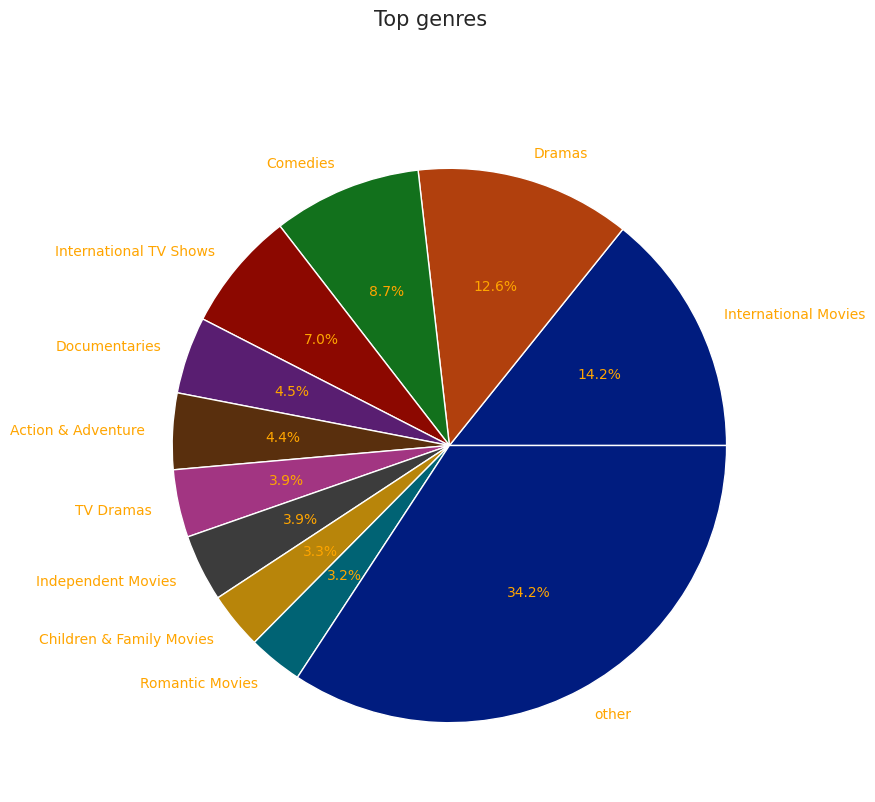

In [32]:
other = pd.Series(genres.sum() - genres[:10].sum(), ['other'])

top_genres = genres[:10].append(other)

plt.figure(figsize=(15,9))
plt.suptitle('Top genres', fontsize=15)

ax = plt.pie(top_genres, labels=top_genres.index, autopct='%1.1f%%', textprops={'color': 'orange'})

In [33]:
pairs = {}
for country in top_countries_prod.index[:-1]:
  c_g = df[df['country'] == country]['listed_in']
  c_g.reset_index(drop=True, inplace=True)
  c_g = types(c_g)
  c_g = Counter(c_g)

  pairs[country] = tuple(sorted(c_g.items(), key=lambda x: x[1], reverse=True))[0]

top_countries_genres = pd.Series(pairs)
top_countries_genres

United States                     (Dramas, 591)
India               (International Movies, 817)
United Kingdom          (British TV Shows, 196)
Japan             (International TV Shows, 141)
South Korea       (International TV Shows, 149)
Canada                           (Comedies, 39)
Spain                (International Movies, 90)
France               (International Movies, 68)
Mexico               (International Movies, 49)
dtype: object

In [34]:
pairs = {}
for director in top_directors['director']:
  d_g = df[df['director'] == director]['listed_in']
  d_g.reset_index(drop=True, inplace=True)
  d_g = types(d_g)
  d_g = Counter(d_g)

  pairs[director] = tuple(sorted(d_g.items(), key=lambda x: x[1], reverse=True))[0]

top_directors_genres = pd.Series(pairs)
top_directors_genres

Rajiv Chilaka             (Children & Family Movies, 19)
Raúl Campos, Jan Suter             (Stand-Up Comedy, 18)
Marcus Raboy                       (Stand-Up Comedy, 15)
Suhas Kadav               (Children & Family Movies, 16)
Jay Karas                          (Stand-Up Comedy, 13)
Cathy Garcia-Molina           (International Movies, 13)
Martin Scorsese                              (Dramas, 9)
Jay Chapman                        (Stand-Up Comedy, 12)
Youssef Chahine                             (Dramas, 12)
Steven Spielberg                             (Dramas, 6)
Don Michael Paul                 (Action & Adventure, 9)
David Dhawan                               (Comedies, 9)
Lance Bangs                         (Stand-Up Comedy, 8)
Shannon Hartman                     (Stand-Up Comedy, 8)
Johnnie To                     (International Movies, 8)
dtype: object

In [35]:
df.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,TV Show,Blood & Water,unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",unknown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,TV Show,Jailbirds New Orleans,unknown,unknown,unknown,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,TV Show,Kota Factory,unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
